### Airfoil Self-Noise Data Set from UCI-ML Repository [link to dataset](https://archive.ics.uci.edu/ml/datasets/Airfoil+Self-Noise)
#### NASA data set, obtained from a series of aerodynamic and acoustic tests of two and three-dimensional airfoil blade sections conducted in an anechoic wind tunnel. The NASA data set comprises different size NACA 0012 airfoils at various wind tunnel speeds and angles of attack. The span of the airfoil and the observer position were the same in all of the experiments.
#### A regression problem with: 
- 1,503 samples, 
- 23 variables (or inputs): 1. Frequency, in Hertzs. 2. Angle of attack, in degrees. 3. Chord length, in meters. 4. Free-stream velocity, in meters per second. 5. Suction side displacement thickness, in meters.
- 1 numerical output: Scaled sound pressure level, in decibels.
- no missing values

### PROBLEM STATEMENT: Predict the output based on the inputs.
- Import the data and view them
- Explore the distribution of the OUTPUT

In [1]:
# Import libraries and settings
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.figsize'] = (12, 12)
matplotlib.rcParams.update({'font.size': 24})
from matplotlib.ticker import MaxNLocator
import seaborn as sns
sns.set(font_scale=0.8) 

In [2]:
df = pd.read_table("airfoil_self_noise.dat", header=None, index_col=False, names=['Freq', 'Angle', 'Length', 'Velocity', 'Thickness', 'Pressure'])
df

,Freq,Angle,Length,Velocity,Thickness,Pressure
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461
...,...,...,...,...,...,...
1498,2500,15.6,0.1016,39.6,0.052849,110.264
1499,3150,15.6,0.1016,39.6,0.052849,109.254
1500,4000,15.6,0.1016,39.6,0.052849,106.604
1501,5000,15.6,0.1016,39.6,0.052849,106.224


### Is there any correlation between the inputs and the output?

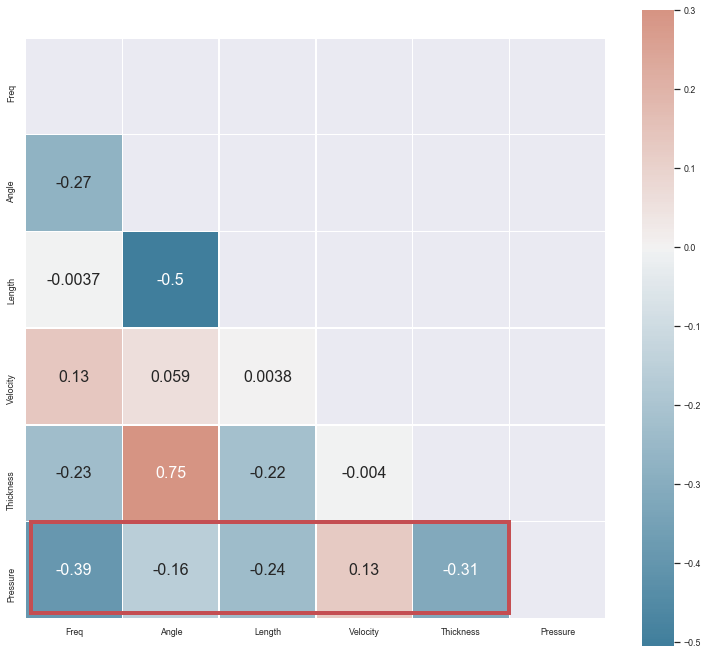

In [3]:
# Compute the correlation matrix
corr = df.corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(13, 13))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)


# Draw the heatmap with the mask and correct aspect ratio
heat = sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": 0.9}, annot=True, annot_kws={"size":16})
sns.set(font_scale=2)
import matplotlib.patches as patches
# Create a Rectangle patch
rect = patches.Rectangle((0.05,5),4.95,0.95,linewidth=4,edgecolor='r',facecolor='none')
# Add the patch to the Axes
ax.add_patch(rect)

#### The Pressure correlates moderately with Frequency and Thickness
### Let's look at bivariate plots

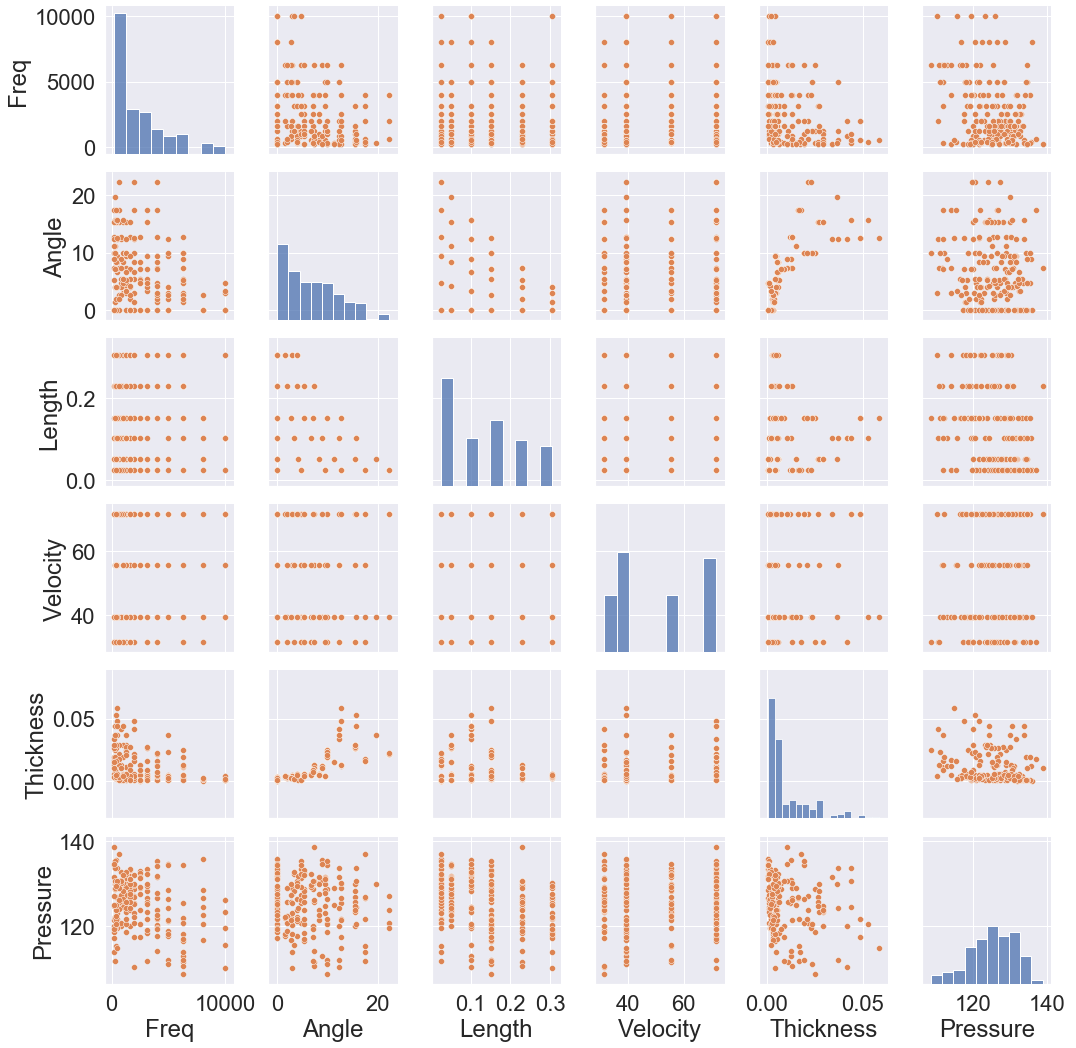

In [4]:
g = sns.pairplot(df.sample(n=200, random_state=1),\
                 kind='scatter', diag_kind='hist') # point out imbalanced dataset and switch diag_kind from 'hist' to 'kde'
g.map_offdiag(sns.scatterplot)
g.add_legend()

### Split the data. We will use 2/3 to fit/train the model and 1/3 test the model

In [5]:
# Separate inputs: X and output:y
X = df.drop(['Pressure'], axis = 1)
y = df['Pressure']

In [6]:
# Split in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=23)

In [7]:
regression = LinearRegression()
regression.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Outputs

In [8]:
print('R^2 is: %.3f' % regression.score(X_train,y_train))

R^2 is: 0.501


In [9]:
# print('The coefficient or slope is: %.3f' % regression.coef_)
regression.coef_

array([-1.27937338e-03, -3.87642296e-01, -3.54506587e+01,  9.81348394e-02,
       -1.46263168e+02])

In [10]:
print('The intercept is: %.3f' % regression.intercept_)

The intercept is: 132.608


### Predict the values for the 1/3 of the samples we left out to test the model accuracy. Plot relevant graphs. E.g. boxplot and correlation/bias

In [11]:
y_test_predicted = regression.predict(X_test)
y_test_predicted[:10]

array([121.82104587, 132.94497161, 129.90833266, 122.03853935,
       123.20728462, 126.28143821, 123.61302694, 126.13565734,
       123.19704065, 121.39180884])

In [12]:
error = y_test_predicted - y_test

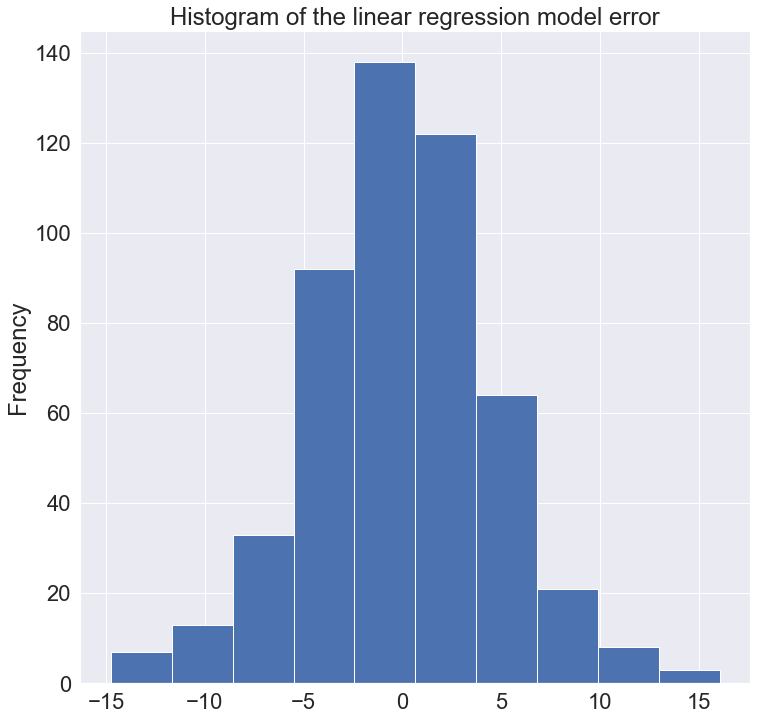

In [13]:
error.plot(kind='hist', title = 'Histogram of the linear regression model error')

In [14]:
print('The average error is: %.3f dB' % error.mean())
print('The minimum error is: %.3f dB' % error.min())
print('The maximum error is: %.3f dB' % error.max())

The average error is: -0.086 dB
The minimum error is: -14.760 dB
The maximum error is: 16.054 dB


Text(0, 0.5, 'Model error (dB)')

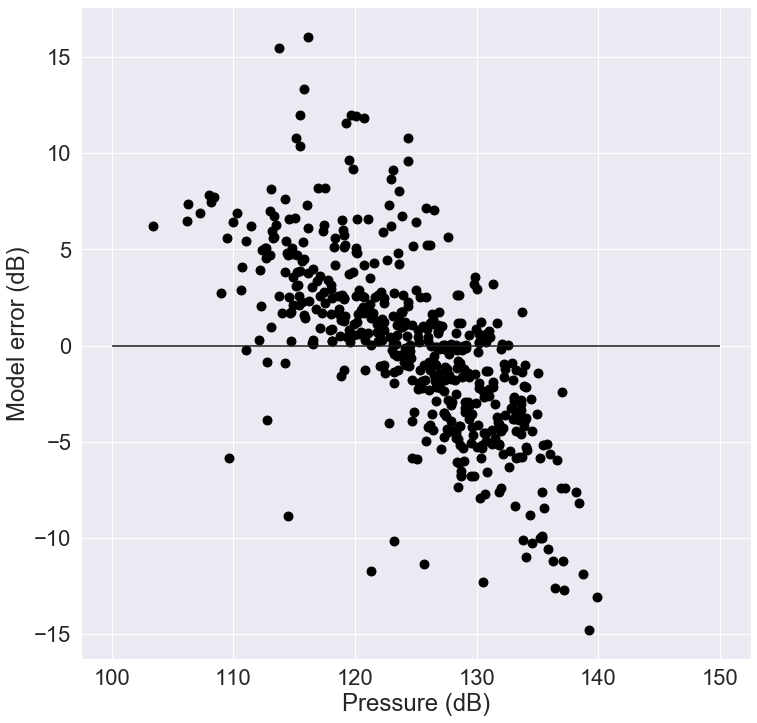

In [15]:
# Plot the outputs
plt.scatter(y_test, error, s=80, marker="o", color='black')
plt.hlines(0, 100, 150, linestyles='solid')
plt.xlabel('Pressure (dB)', fontsize = 24)
plt.ylabel('Model error (dB)', fontsize = 24)

### Anything wrong with this simple model? There is systematic bias: low pressure is overestimated; high pressure is underestimated